# Project 3 - 고양이 수염 스티커 붙이기

In [44]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

### (1) 얼굴 이미지 불러오기

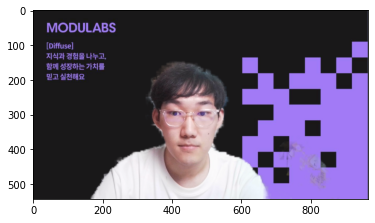

In [45]:
my_image_path = './images/my_front.png'

img_bgr = cv2.imread(my_image_path, 1)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

### (2) 얼굴 검출하기

In [46]:
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기

In [47]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(366, 242) (551, 428)]]


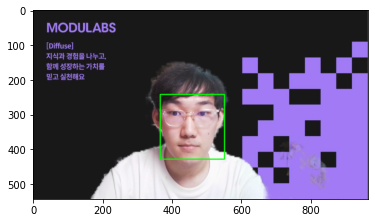

In [48]:
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    # 왼쪽 위 좌표와 오른쪽 아래 좌표 사이 직각 사각형
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### (3) 랜드마크 검출하기

In [50]:
model_path = './models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path) # 랜드마크 위치 검출기

In [53]:
list_landmarks = [] # 랜드마크 위치 list

for dlib_rect in dlib_rects: # 얼굴 영역 박스 별 face landmark
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0])) # list_landmarks의 원소는 1개

68


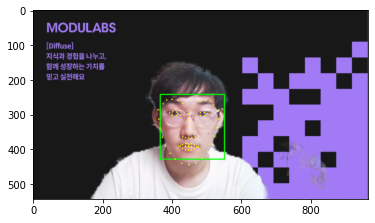

In [54]:
for landmark in list_landmarks: # 얼굴 영역 박스 별 face landmark
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### (4) 스티커 위치 정하기

In [55]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = (landmark[30][1] + landmark[33][1]) // 2 # 이미지에서 코 부위의 y값과 코 끝 부위의 y값의 중간값
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(449, 353)
(x,y) : (449,360)
(w,h) : (186,186)


(186, 186, 3)


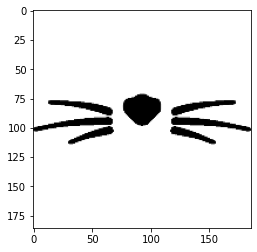

In [58]:
sticker_path = './images/cat_whiskers.png' # 스티커 이미지 경로
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정

print (img_sticker.shape)
plt.imshow(img_sticker)

In [59]:
refined_x = x - w // 2
refined_y = y - h // 2
# 이미지 시작점은 top-left 좌표이므로 스티커를 붙이기 위한 x, y 재설정

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (356,267)


In [61]:
# 스티커 이미지가 얼굴 이미지 밖에서 시작하지 않도록 조정이 필요함
# 음수값 만큼 스티커 이미지를 자른다.
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (356,267)


### (5) 스티커 붙이기

In [62]:
# 스티커의 영역 정하기
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# 스티커 영역 중, 스티커에 해당하지 않는 부분은 얼굴 이미지로, 나머지는 스티커로 설정한다.
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

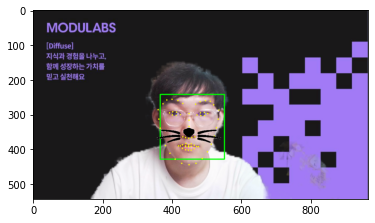

In [63]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

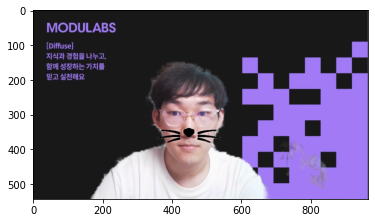

In [64]:
# 최종 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()